<a href="https://colab.research.google.com/github/ChihHsiangChien/3rd-ML100Days/blob/master/homework/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import os
import keras
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 掛載雲端硬碟，並將壓縮檔解開

In [44]:
!ls gdrive/'My Drive'/MyKeras/

final_model.h5	ml100-03-final.zip  my_model_weights.h5  result.csv  tmp.h5


In [0]:
#解Google drivek的壓縮檔
import zipfile
zip_ref = zipfile.ZipFile("gdrive/My Drive/MyKeras/ml100-03-final.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [43]:
!ls /tmp/image_data/

test  train  valid


In [0]:
!ls /tmp/image_data/train/

daisy  dandelion  rose	sunflower  tulip


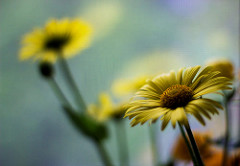

In [19]:
from PIL import Image
img = Image.open('/tmp/image_data/train/daisy/f15aa457c895c8e31d2d032d4fc271c2.jpg')
img

In [0]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [0]:
import cv2 as cv
images = []

for root, dirnames, filenames in os.walk('/tmp/image_data/train/daisy/'):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        im = cv.imread (filepath)
        b,g,r = cv.split(im)
        rgb_img = cv.merge([r,g,b])
        images.append(rgb_img)


In [0]:
import numpy as np
np.array(images).shape

(500,)

In [0]:
images_temp = images[0:30]

In [0]:
len(images_temp)

375

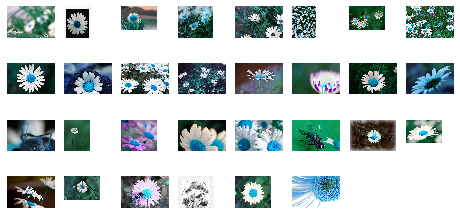

In [0]:
#顯然訓練的圖片集尺寸大小不一
img_combine(images_temp)


In [0]:
images[1].shape

(240, 180, 3)

In [0]:
#將30%圖檔放進valid folder
#在image_data資料夾中新建一個資料夾 valid
!mkdir /tmp/image_data/valid
!ls /tmp/image_data/

test  train  valid


In [0]:
#在valid資料夾裡再新增與train資料夾同樣的圖片資料夾
for root, dirnames, filenames in os.walk('/tmp/image_data/train/'):
    for dirname in dirnames:
        print(dirname)
        img_folder_path = '/tmp/image_data/valid/' + dirname
        print(img_folder_path)
        !mkdir $img_folder_path

dandelion
/tmp/image_data/valid/dandelion
daisy
/tmp/image_data/valid/daisy
sunflower
/tmp/image_data/valid/sunflower
rose
/tmp/image_data/valid/rose
tulip
/tmp/image_data/valid/tulip


In [7]:
#檢查是否有新增成功
!ls /tmp/image_data/valid

daisy  dandelion  rose	sunflower  tulip


In [0]:
#測試隨機取亂數的演算法
import random

for k in range(10):
    test_sum = 0
    for i in range(100):
        ran = random.random()
        if ran <.3:
            test_sum += 1
    print(test_sum)


29
23
28
36
25
27
23
28
29
31


In [0]:
img_folder_paths = []
for root, dirnames, filenames in os.walk('/tmp/image_data/train/'):
    #印出有圖片在內的資料夾路徑
    if len(filenames) > 0 :
        img_folder_paths.append(root)
print(img_folder_paths)

['/tmp/image_data/train/dandelion', '/tmp/image_data/train/daisy', '/tmp/image_data/train/sunflower', '/tmp/image_data/train/rose', '/tmp/image_data/train/tulip']


In [0]:
#將原本的圖片拿30%去放在valid 資料夾
import random

for img_folder_path in img_folder_paths:
    image_moved_counts = 0
    for root, dirnames, filenames in os.walk(img_folder_path):
        image_counts = len(filenames)
        for filename in filenames:
            ran = random.random()
            if ran < .3:
                src_filepath = os.path.join(root, filename)
                valid_path = root.replace('train', 'valid')
                dst_filepath = os.path.join(valid_path, filename)
                #print(valid_path)
                #print(src_filepath)
                #print(dst_filepath)
                os.replace( src_filepath , dst_filepath)
                image_moved_counts +=1
        print(image_moved_counts,'/',image_counts ,f'{image_moved_counts/image_counts:9.2f}')


220 / 687      0.32
154 / 500      0.31
161 / 488      0.33
151 / 515      0.29
162 / 633      0.26


In [45]:
#檢查train和valid的圖片數量
for root, dirnames, filenames in os.walk('/tmp/image_data/train/'):
    print(len(filenames))
for root, dirnames, filenames in os.walk('/tmp/image_data/valid/'):
    print(len(filenames))


0
467
346
327
364
471
0
220
154
161
151
162


# 參考 https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras import backend as K
from keras.models import Model

from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator



In [0]:
#參數
image_size = (256, 256)  #image size = (256, 256)

batch_size = 64      # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 5     # 類別的數量，5共有 5 個類別
epochs = 30          # 訓練整個資料集共 30個循環

freeze_layers = 2    # 凍結網路層數

dataset_path = '/tmp/image_data/'

In [46]:
# 透過 data augmentation 產生訓練與驗證用的影像資料
train_datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=10,
    horizontal_flip=True,
    fill_mode='nearest')

train_batches = train_datagen.flow_from_directory(dataset_path + '/train',
                                                  target_size = image_size,
                                                  interpolation ='bicubic',
                                                  class_mode = 'categorical',
                                                  shuffle = True,
                                                  batch_size = batch_size)


valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(dataset_path + '/valid',
                                                  target_size = image_size,
                                                  interpolation = 'bicubic',
                                                  class_mode = 'categorical',
                                                  shuffle = False,
                                                  batch_size = batch_size)


Found 1975 images belonging to 5 classes.
Found 848 images belonging to 5 classes.


In [0]:
#建立ResNet50 model
# 以訓練好的 ResNet50 為基礎來建立模型，
# 捨棄 ResNet50 頂層的 fully connected layers
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(image_size[0],image_size[1],3))
x = net.output
x = Flatten()(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(num_classes, activation='softmax', name='softmax')(x)


# 設定凍結與要進行訓練的網路層
model = Model(inputs=net.input, outputs=output_layer)
for layer in model.layers[:freeze_layers]:
    layer.trainable = False
for layer in model.layers[freeze_layers:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 輸出整個網路結構
print(model.summary())



/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1

In [0]:
#訓練模型
history = model.fit_generator(
    train_batches,
    steps_per_epoch = train_batches.samples // batch_size,
    epochs = epochs,
    verbose=1,
    validation_data = valid_batches,
    validation_steps = valid_batches.samples // batch_size,
)

#


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
30/30 [==============================] - 56s 2s/step - loss: 3.1848 - acc: 0.2771 - val_loss: 1.5160 - val_acc: 0.5228
Epoch 2/30
30/30 [==============================] - 43s 1s/step - loss: 2.1075 - acc: 0.4595 - val_loss: 1.0259 - val_acc: 0.6709
Epoch 3/30
30/30 [==============================] - 42s 1s/step - loss: 1.4909 - acc: 0.6067 - val_loss: 0.8340 - val_acc: 0.7385
Epoch 4/30
30/30 [==============================] - 41s 1s/step - loss: 1.2892 - acc: 0.6404 - val_loss: 0.6980 - val_acc: 0.7883
Epoch 5/30
30/30 [==============================] - 41s 1s/step - loss: 0.9947 - acc: 0.7003 - val_loss: 0.6555 - val_acc: 0.8125
Epoch 6/30
30/30 [==============================] - 40s 1s/step - loss: 0.8843 - acc: 0.7463 - val_loss: 0.6302 - val_acc: 0.8240
Epoch 7/30
30/30 [==============================] - 40s 1s/step - loss: 0.8511 - acc: 0.7570 - val_loss: 0.5583 - val_acc: 0

NameError: ignored

In [0]:
#印出結果
#score = model.evaluate_generator(valid_datagen,)
  
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [0]:
model.save('gdrive/My Drive/MyKeras/final_model.h5')   


In [0]:
#印出圖
plt.plot(model.history.history['acc'],label='acc')
plt.plot(model.history.history['val_acc'], label='val_acc')
plt.legend(loc=2)
plt.show()
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend(loc=2)
plt.show()

In [8]:
#檢查test的圖檔
!ls /tmp/image_data/

test  train  valid


In [0]:
#載入測試圖片，要提交檔案
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# 載入訓練好的模型
model = load_model('gdrive/My Drive/MyKeras/final_model.h5')

In [56]:
#花朵分類的編碼
flower_mapping = train_batches.class_indices
#flower_mapping = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4} )

key_list = list(flower_mapping.keys()) 
val_list = list(flower_mapping.values()) 

# From value to key
print(key_list[val_list.index(0)]) 


daisy


In [59]:
#write to csv
import csv

with open('gdrive/My Drive/MyKeras/result2.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    #csv檔的標題
    writer.writerow(['id', 'flower_class'])
    for root, dirnames, filenames in os.walk('/tmp/image_data/test/'):
        for filename in filenames:
            filepath = os.path.join(root, filename)
            #print(filepath)
            img = image.load_img(filepath, target_size=(256, 256))
            if img is None:
                continue
                
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis = 0)
            pred = model.predict(x)[0]
            top_inds = pred.argsort()[::-1][:5]
            print( filename.replace('.jpg',''),top_inds[0], key_list[val_list.index(top_inds[0])] )
            #在csv輸出
            writer.writerow([filename.replace('.jpg',''), top_inds[0]])

0bfd70207c02f6fc77f4835468024c2a 2 rose
27cb1939d202689334de4f53b0e33a41 1 dandelion
138506e5ea273cb5d99c9957b02ee37d 1 dandelion
08a4c95527bb9bdc648c0272624c2b92 4 tulip
aa4d89923d74bc247b29b306b62c2662 0 daisy
f9745be00ab758aff6cb7272d1d6d625 0 daisy
c90b3b446fe3fa178471254117dafe10 4 tulip
c4cf85bc0fb71fcf61128580493c4f66 1 dandelion
e86789078f3731bdc3d1e740825f29b3 3 sunflower
c4849a51f75a76ba25a1cd55fa48a649 4 tulip
a77cff5c02766935e73241222a72e008 2 rose
b0285eee6c90d102a05a2e2db53a7130 3 sunflower
c313fd03eb9513bc25f782607b625c81 1 dandelion
c2e769f168fe0bc3062fc81a62969a97 3 sunflower
575e3afab9b5af95c7a3073549833bf2 4 tulip
7baf51ae88cf50cd058225640feebf68 3 sunflower
930619d1c7dbc1d46e28742a1fafee4d 4 tulip
0899def3ea7f58ee950f6bd1d6061bea 3 sunflower
43b56f8d2a7dbc8c69a98f002fea9879 2 rose
c4c119e3e6afda90b43e844fc7d725a3 1 dandelion
e3da47c37524e4654bb0e1ada633151f 0 daisy
45941dd36c8ce5639c55a41e1e929ce6 4 tulip
86ee7ac1665cb42c6a1df5b5745d9d83 1 dandelion
99df788efd73f990

In [0]:
#下載分析結果
from google.colab import files
files.download('gdrive/My Drive/MyKeras/result.csv')


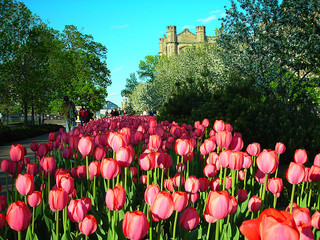

In [25]:
img = Image.open('/tmp/image_data/test/a68cfdd2889c3b1e07a6228a31b66849.jpg')
img

In [0]:
import cv2 as cv
images = []

for root, dirnames, filenames in os.walk('/tmp/image_data/test/'):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        im = cv.imread (filepath)
        b,g,r = cv.split(im)
        rgb_img = cv.merge([r,g,b])
        images.append(rgb_img)

In [63]:
len(images)

2000

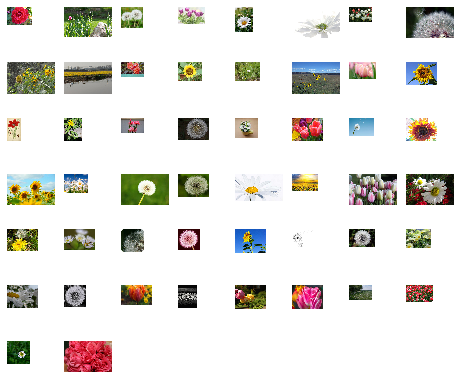

In [37]:
img_combine(images[0:50])
